In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
d_url="https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset"
od.download(d_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aanandgnair
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:15<00:00, 187MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

In [ ]:
#EDA
len(os.listdir("/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3, horizontal_flip= True, preprocessing_function= preprocess_input )

val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size= (256,256), batch_size=32)

val = val_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size= (256,256), batch_size=32)


Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label = train.next()

In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

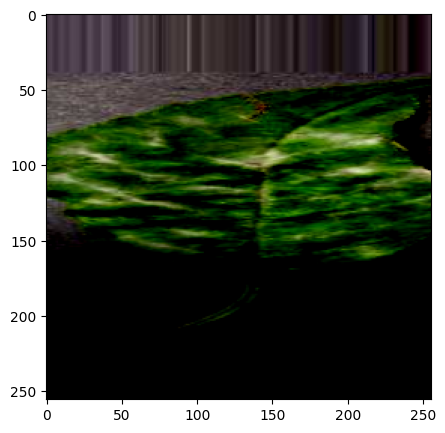

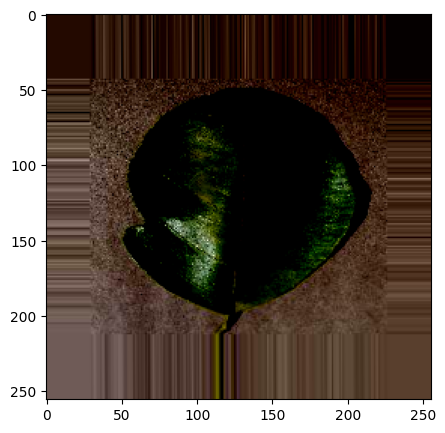

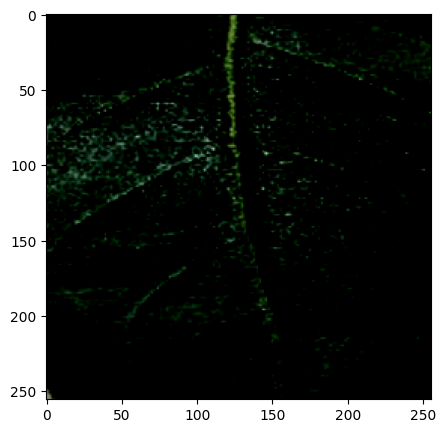

In [ ]:
plotImage(t_img[:3], label[:3])

In [ ]:
#Building Model
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import Inception_v3
import keras

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3), include_top= False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units = 38, activation='softmax')(X)

#CREATING MODEL
model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
#Early Stopping and Model Chckpoints
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Earlystopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01, patience= 3, verbose=1)

#ModelCheckpoint
mc = ModelCheckpoint(filepath="best_model.h5",
                     monitor='val_accuracy',
                     min_delta= 0.01,
                     patience= 3,
                     verbose=1,
                     save_best_only= True)

cb = [es, mc]

In [ ]:
his = model.fit_generator(train,
                          steps_per_epoch=16,
                          epochs= 50,
                          verbose=1,
                          callbacks= cb,
                          validation_data= val,
                          validation_steps= 16)

<ipython-input-47-51fcc0b73837>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 25.5532 - accuracy: 0.1387
Epoch 1: val_accuracy improved from -inf to 0.19922, saving model to best_model.h5
16/16 [==============================] - 23s 910ms/step - loss: 25.5532 - accuracy: 0.1387 - val_loss: 23.0876 - val_accuracy: 0.1992
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 15.2939 - accuracy: 0.3398
Epoch 2: val_accuracy improved from 0.19922 to 0.40234, saving model to best_model.h5
16/16 [==============================] - 14s 897ms/step - loss: 15.2939 - accuracy: 0.3398 - val_loss: 9.2568 - val_accuracy: 0.4023
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 9.5017 - accuracy: 0.4082
Epoch 3: val_accuracy improved from 0.40234 to 0.49609, saving model to best_model.h5
16/16 [==============================] - 11s 682ms/step - loss: 9.5017 - accuracy: 0.4082 - val_loss: 5.9952 - val_accuracy: 0.4961
Epoch 4/50
16/16 [==============================] - ETA: 0s - 

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

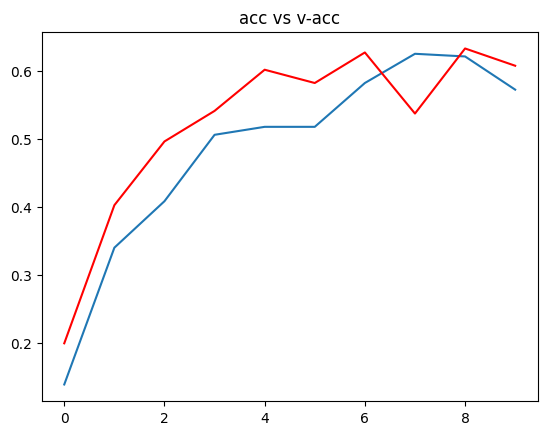

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()

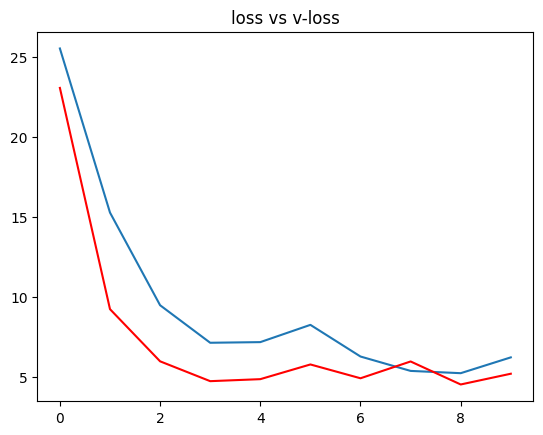

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load Best Model

from keras.models import load_model

model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]

print(f"The accuracy of the model is = {acc*100} %")

<ipython-input-52-55e83f32c4df>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of the model is = 62.46300935745239 %


In [ ]:
ref = dict(zip( list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
def prediction(path):

  img = load_img(path, target_size= (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im , axis=0)

  pred = np.argmax(model.predict(img))
  print(f"the image belongs to {ref[pred]}")

In [ ]:
path = "//content/new-plant-diseases-dataset/test/test/PotatoHealthy2.JPG"

prediction(path)

1/1 [==============================] - 0s 95ms/step
the image belongs to Potato___healthy
